In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel('player1noset1.xlsx')
df.head()

,match_id,player1,server,p1_winner,p1_unf_err,p1_net_pt_won,p1_break_pt_missed,p1_points_won,set_no,F
0,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
1,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
2,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
3,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
4,2023-wimbledon-1301,Carlos Alcaraz,1,1,0,0,0,35,2,0.332028


In [2]:
df=df.drop('match_id',axis=1)
df=df.drop('player1',axis=1)
df=df.drop('set_no',axis=1)
df=df.drop('p1_points_won',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   server              904 non-null    int64  
 1   p1_winner           904 non-null    int64  
 2   p1_unf_err          904 non-null    int64  
 3   p1_net_pt_won       904 non-null    int64  
 4   p1_break_pt_missed  904 non-null    int64  
 5   F                   904 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 42.5 KB


In [3]:
#缺失值检验
df[df.isnull()==True].count()

server                0
p1_winner             0
p1_unf_err            0
p1_net_pt_won         0
p1_break_pt_missed    0
F                     0
dtype: int64

In [4]:
df['server'] = df['server'].replace({1:1, 2: 0})
df.head()

,server,p1_winner,p1_unf_err,p1_net_pt_won,p1_break_pt_missed,F
0,0,0,0,0,0,0.185294
1,0,0,0,0,0,0.185294
2,0,0,0,0,0,0.185294
3,0,0,0,0,0,0.185294
4,1,1,0,0,0,0.332028


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


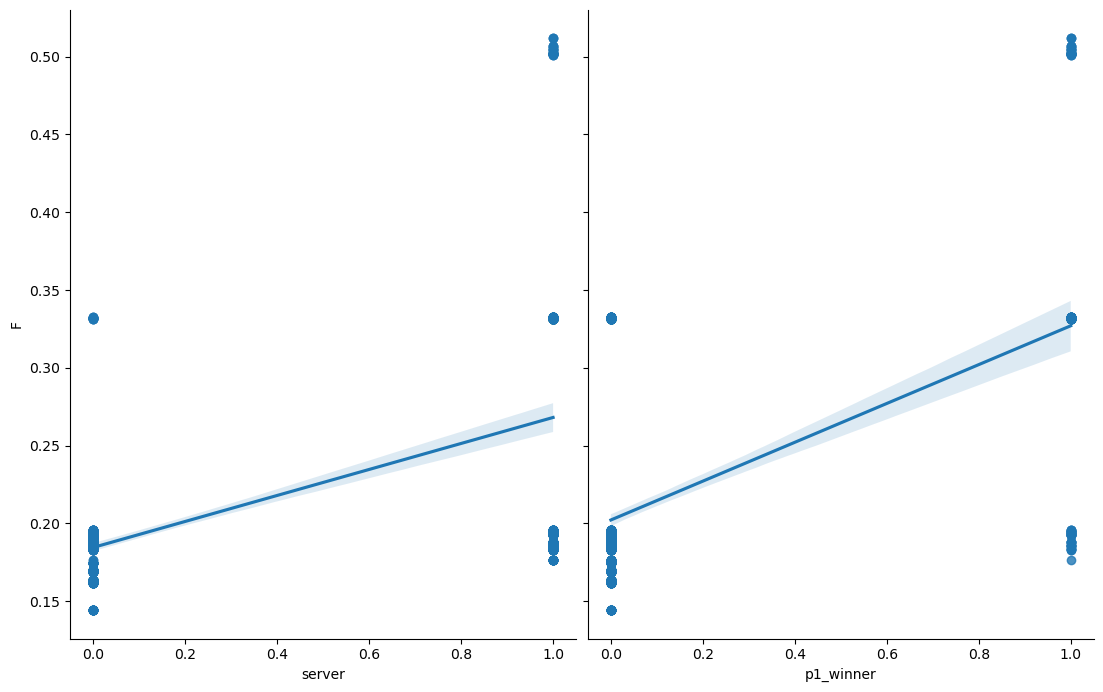

In [6]:
import seaborn as sns
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['server','p1_winner'], y_vars='F', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = df[['server', 'p1_winner', 'p1_unf_err', 'p1_net_pt_won', 'p1_break_pt_missed']]
y = df['F']
X_train,X_test,Y_train,Y_test = train_test_split(X, y,train_size = 0.8,test_size = 0.2)
 
print("原始数据特征:",X.shape,",训练数据特征:",X_train.shape,",测试数据特征:",X_test.shape)
print("原始数据标签:",y.shape,",训练数据标签:",Y_train.shape,",测试数据标签:",Y_test.shape)

原始数据特征: (904, 5) ,训练数据特征: (723, 5) ,测试数据特征: (181, 5)
原始数据标签: (904,) ,训练数据标签: (723,) ,测试数据标签: (181,)


In [9]:
model = LinearRegression()
model.fit(X_train,Y_train)

a  = model.intercept_ #截距 
b = model.coef_ #回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 0.1594332927854851 ,回归系数： [0.04988994 0.09925159 0.10227193 0.13733981 0.03710925]


In [10]:
#评估一下

score = model.score(X_test,Y_test) 
print(score)

0.8318757896403612


In [11]:
#看看预测效果
#对线性回归进行预测
Y_pred = model.predict(X_test)
print(Y_pred)

[0.15943329 0.44591462 0.26170522 0.20932323 0.15943329 0.15943329
 0.15943329 0.20932323 0.20932323 0.20932323 0.15943329 0.20932323
 0.20932323 0.15943329 0.26170522 0.15943329 0.20932323 0.15943329
 0.30857482 0.31159516 0.31159516 0.19654254 0.20932323 0.15943329
 0.20932323 0.15943329 0.25868488 0.2967731  0.15943329 0.15943329
 0.34666304 0.15943329 0.39602469 0.15943329 0.15943329 0.15943329
 0.15943329 0.31159516 0.19654254 0.20932323 0.15943329 0.15943329
 0.20932323 0.20932323 0.20932323 0.15943329 0.19654254 0.30857482
 0.15943329 0.20932323 0.15943329 0.20932323 0.15943329 0.20932323
 0.15943329 0.44591462 0.20932323 0.20932323 0.15943329 0.15943329
 0.20932323 0.20932323 0.20932323 0.15943329 0.15943329 0.15943329
 0.20932323 0.15943329 0.30857482 0.2967731  0.15943329 0.15943329
 0.20932323 0.20932323 0.15943329 0.15943329 0.20932323 0.15943329
 0.30857482 0.20932323 0.15943329 0.15943329 0.15943329 0.44591462
 0.20932323 0.15943329 0.19654254 0.20932323 0.20932323 0.2093

In [14]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# 计算R-squared
r_squared = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('均方误差:', mse)
print('平均绝对误差:', mae)
print('R-squared:', r_squared)

均方误差: 0.0009722911219355023
平均绝对误差: 0.024549568903673345
R-squared: 0.8318757896403612


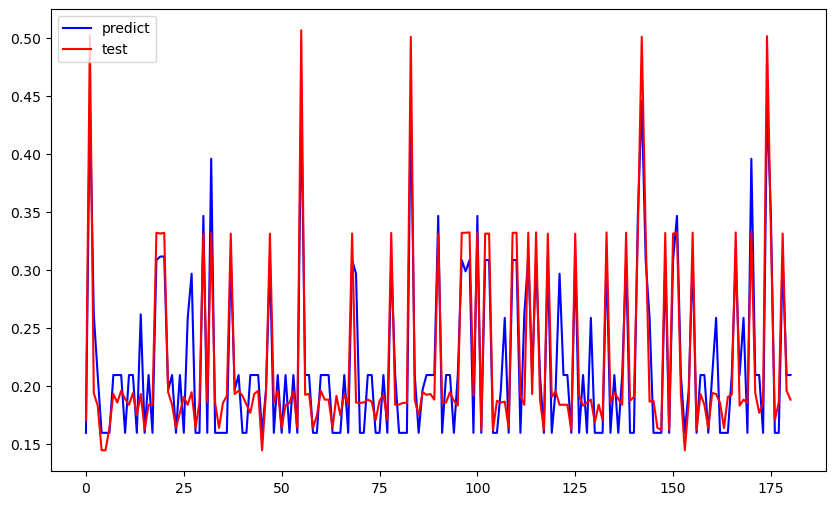

In [12]:

#显示图像
#添加图标标签
plt.subplots(figsize=(10, 6))  # 10英寸宽，6英寸高
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_test)),Y_test,'r',label="test")
plt.legend(loc=2)
plt.show()

就还行吧。。